In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

In [ ]:
Business Problem : Heart Diseases are becoming increasingly prominent across individuals in all parts of the world. The number of people passing away every day month and year is a testament to that statement. Whether it is becoming a victim of the disease in itself or having to start with smaller kind of ailments eventually leading to death (due to a heart failure), the number of lives it actually impacts, is abnormally high. Based on the data in the csv file my goal is to come up with an AI model that can predict who among male and females are most prone to getting the disease. Healthcare personnel can therefore recommend medication, surgery or any other form of corrective treatment. Doing this can not only prolong the life span of the individual but can also gradually decrease the death rate in our community.

In [3]:
df = pd.read_csv('Documents/heart.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [7]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  
y = data.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  650.008493
9    oldpeak  253.653461
2         cp  217.823922
11        ca  210.625919
8      exang  130.470927
4       chol  110.723364
0        age   81.425368
3   trestbps   45.974069
10     slope   33.673948
1        sex   24.373650
12      thal   19.373465
6    restecg    9.739343


[0.07238698 0.05686948 0.12196849 0.06167123 0.05860003 0.02096822
 0.03656317 0.08866404 0.0979978  0.09386785 0.06295652 0.12253444
 0.10495176]


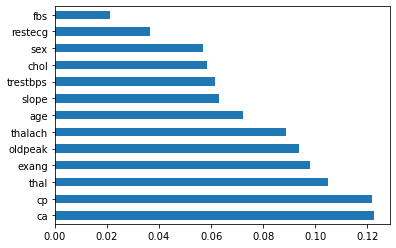

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

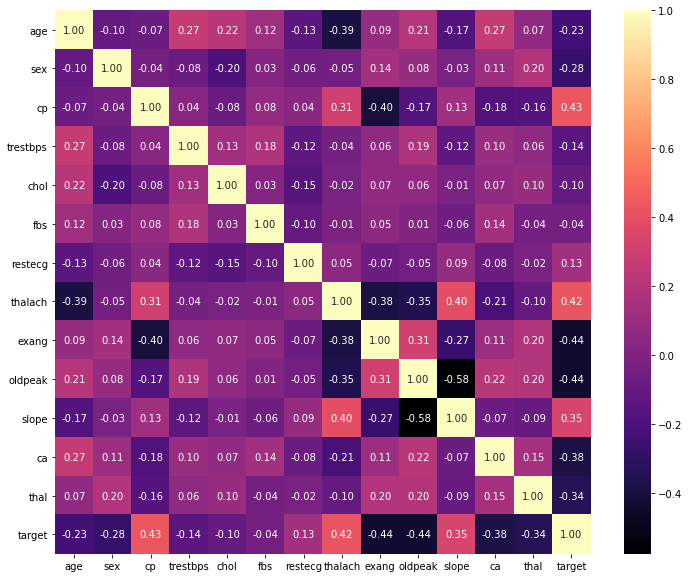

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

Text(0.5, 1.0, 'Gender v/s target\n')

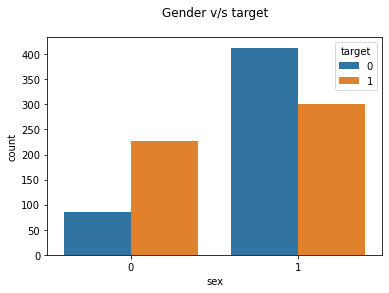

In [12]:
sns.countplot(data= df, x='sex',hue='target')
plt.title('Gender v/s target\n')

In [ ]:
In the bar chart shown above, blue depicts 'No heart disease' and orange is for 'Heart Disease'. '0' is for Male and 1 is for Female. The analysis clearly points to the fact women are more prone to getting a heart disease than men. 

In [13]:
report = sv.analyze(df)
report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:12  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

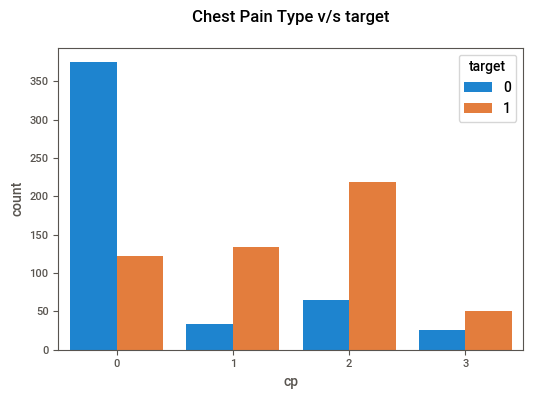

In [14]:
sns.countplot(data= df, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

In [ ]:
In the bar chart shown above, blue is for 'No heart disease' and orange is for 'Heart Disease'
CP : Chest Pain. There are 4 types which are : 
Value 0 : Asymptomatic
Value 1 : Atypical angina
Value 2 : Non - anginal pain
Value 3 : Typical Angina

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

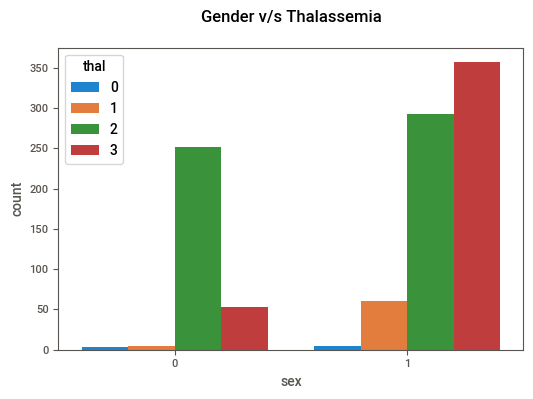

In [15]:
sns.countplot(data= df, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')

In [ ]:
In the bar chart shown above, 0 is for Male and 1 is for Female. Thalassemia is basically a blood disorder that causes an individuals body to have lesser haemoglobin than the usual.
Value 0 : NULL
Value 1 : Fixed Defect (No blood flow observed in some parts of the heart)
Value 2 : Normal blood flow
Value 3 : Reversible Defect (a blood flow is observed but it is not normal)

Text(0.5, 1.0, 'Slope v/s Target\n')

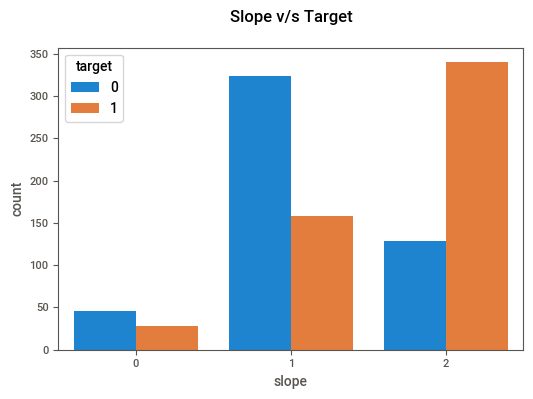

In [16]:
sns.countplot(data= df, x='slope',hue='target')
plt.title('Slope v/s Target\n')

In [ ]:
In the bar graph shown above, blue is for 'No Heart Disease' and orange depicts the 'Heart Disease'
Slope : the slope of the peak exercise ST segment
0 : downsloping
1 : Flat
2 : Upsloping

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

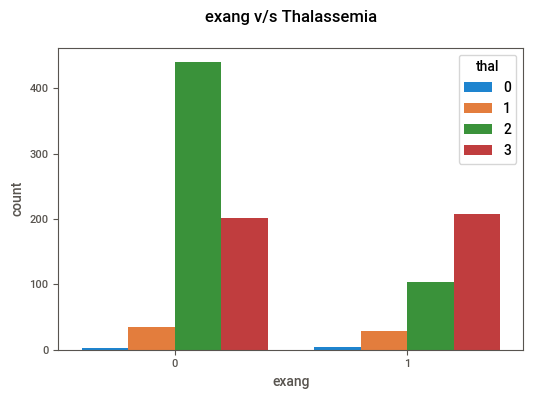

In [17]:
sns.countplot(data= df, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

In [ ]:
exang : Exercise induced angina
1 = yes
0 = no

Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

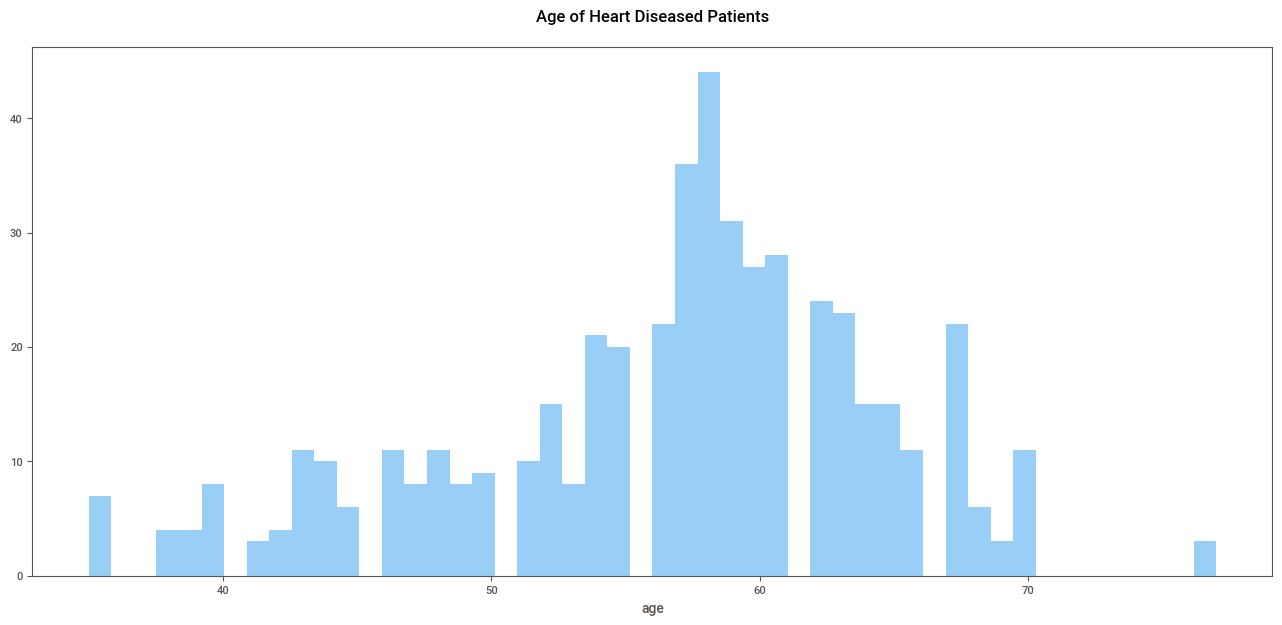

In [18]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

In [ ]:
Based on the graph shown above, a critical conclusion that we can make that most heart diseased patients are between the age group of 41 to 60. As a result, this would be the group of people that the healthcare department should focus on, primarily. 

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

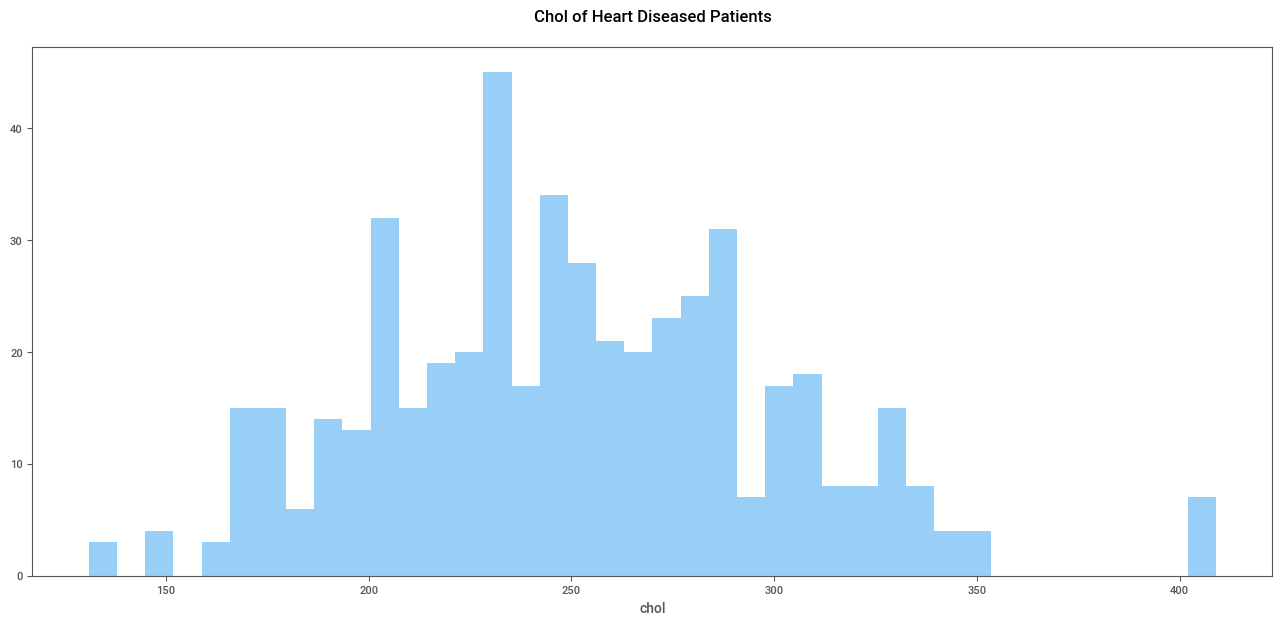

In [19]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

In [ ]:
We all know that cholesterol is a key factor in determining the condition of the human heart. This can be related to the first graph, where we see that the graph is more denser between the 200 and 300 range. 

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

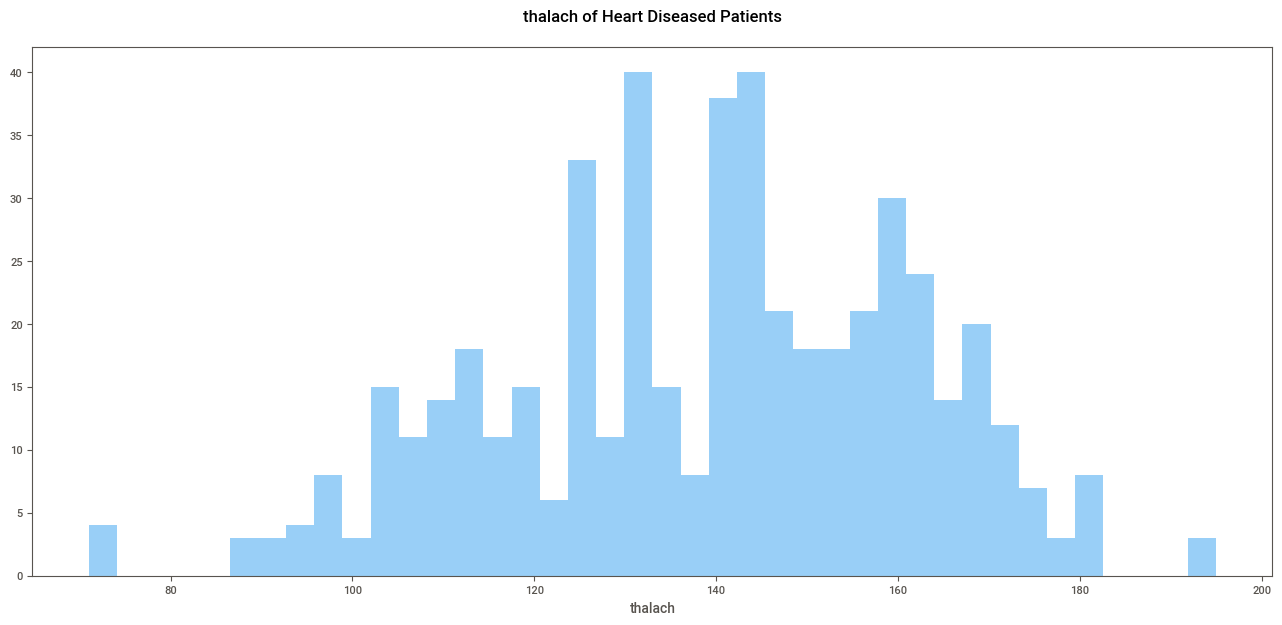

In [20]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

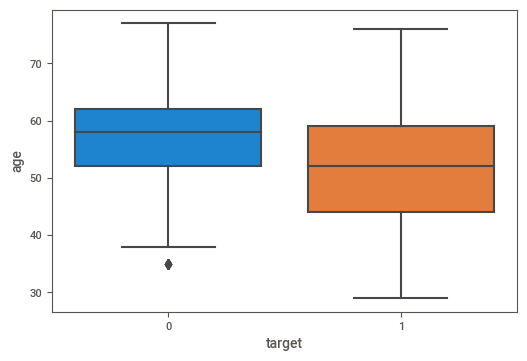

In [21]:
sns.boxplot(data=df,x='target',y='age')

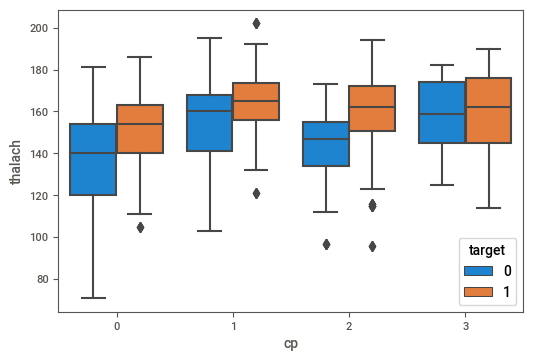

In [22]:
sns.boxplot(data=df,x='cp',y='thalach',hue='target')

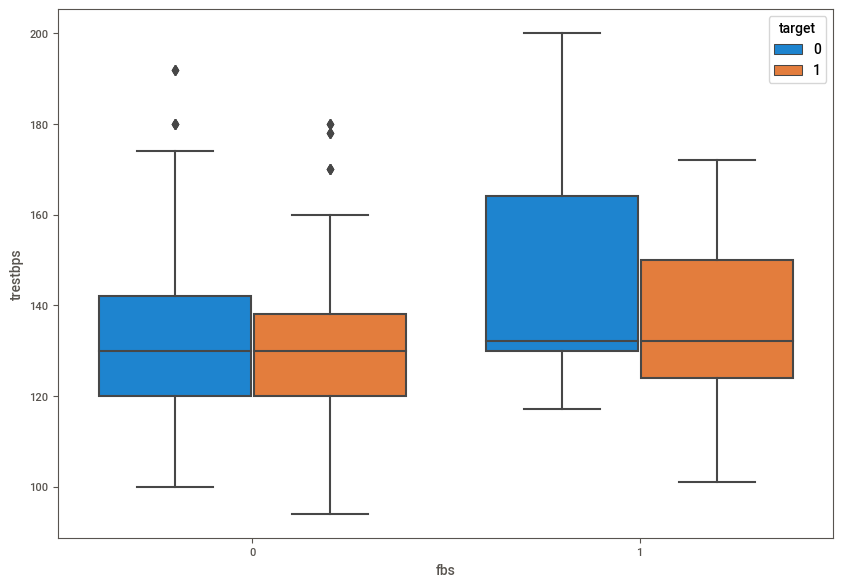

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='fbs',y='trestbps',hue='target')

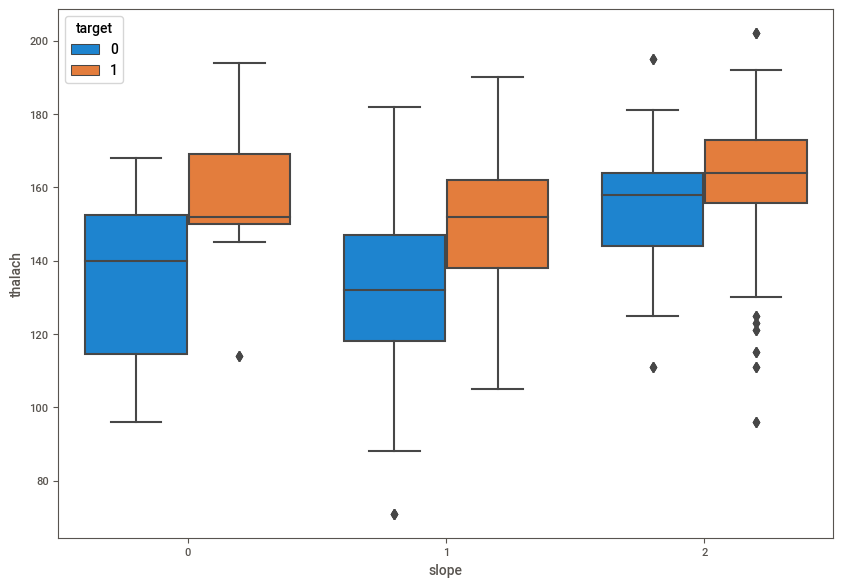

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='slope',y='thalach',hue='target')

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics 
X = df.iloc[:,0:13] 
y = df.iloc[:,13] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [26]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9902597402597403


In [28]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [29]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'

In [30]:
df.head()

age  sex chest_pain_type  resting_blood_pressure  cholesterol  \
0   52    1    asymptomatic                     125          212   
1   53    1    asymptomatic                     140          203   
2   70    1    asymptomatic                     145          174   
3   61    1    asymptomatic                     148          203   
4   62    0    asymptomatic                     138          294   

   fasting_blood_sugar                 rest_ecg_type  max_heart_rate_achieved  \
0                    0                        normal                      168   
1                    1  left ventricular hypertrophy                      155   
2                    0                        normal                      125   
3                    0                        normal                      161   
4                    1                        normal                      106   

   exercise_induced_angina  st_depression st_slope_type  num_major_vessels  \
0                        0            1.0     upsloping                  2   
1                        1            3.1   downsloping                  0   
2                        1            2.6   downsloping                  0   
3                        0            0.0     upsloping                  1   
4                        0            1.9          flat                  3   

    thalassemia_type  target  
0  reversable defect       0  
1  reversable defect       0  
2  reversable defect       0  
3  reversable defect       0  
4             normal       0

In [32]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [33]:
df_temp = data['thalassemia_type_fixed defect']

In [34]:
data = pd.get_dummies(df, drop_first=True)

In [35]:
data.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   52    1                     125          212                    0   
1   53    1                     140          203                    1   
2   70    1                     145          174                    0   
3   61    1                     148          203                    0   
4   62    0                     138          294                    1   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      168                        0            1.0   
1                      155                        1            3.1   
2                      125                        1            2.6   
3                      161                        0            0.0   
4                      106                        0            1.9   

   num_major_vessels  target  chest_pain_type_atypical angina  \
0                  2       0                                0   
1                  0       0                                0   
2                  0       0                                0   
3                  1       0                                0   
4                  3       0                                0   

   chest_pain_type_non-anginal pain  chest_pain_type_typical angina  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   rest_ecg_type_left ventricular hypertrophy  rest_ecg_type_normal  \
0                                           0                     1   
1                                           1                     0   
2                                           0                     1   
3                                           0                     1   
4                                           0                     1   

   st_slope_type_flat  st_slope_type_upsloping  thalassemia_type_normal  \
0                   0                        1                        0   
1                   0                        0                        0   
2                   0                        0                        0   
3                   0                        1                        0   
4                   1                        0                        1   

   thalassemia_type_nothing  thalassemia_type_reversable defect  
0                         0                                   1  
1                         0                                   1  
2                         0                                   1  
3                         0                                   1  
4                         0                                   0

In [36]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

age  sex  resting_blood_pressure  cholesterol  fasting_blood_sugar  \
0   52    1                     125          212                    0   
1   53    1                     140          203                    1   
2   70    1                     145          174                    0   
3   61    1                     148          203                    0   
4   62    0                     138          294                    1   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      168                        0            1.0   
1                      155                        1            3.1   
2                      125                        1            2.6   
3                      161                        0            0.0   
4                      106                        0            1.9   

   num_major_vessels  target  ...  chest_pain_type_non-anginal pain  \
0                  2       0  ...                                 0   
1                  0       0  ...                                 0   
2                  0       0  ...                                 0   
3                  1       0  ...                                 0   
4                  3       0  ...                                 0   

   chest_pain_type_typical angina  rest_ecg_type_left ventricular hypertrophy  \
0                               0                                           0   
1                               0                                           1   
2                               0                                           0   
3                               0                                           0   
4                               0                                           0   

   rest_ecg_type_normal  st_slope_type_flat  st_slope_type_upsloping  \
0                     1                   0                        1   
1                     0                   0                        0   
2                     1                   0                        0   
3                     1                   0                        1   
4                     1                   1                        0   

   thalassemia_type_normal  thalassemia_type_nothing  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        1                         0   

   thalassemia_type_reversable defect  thalassemia_type_fixed defect  
0                                   1                              0  
1                                   1                              0  
2                                   1                              0  
3                                   1                              0  
4                                   0                              0  

[5 rows x 21 columns]

In [37]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

In [38]:
#LogisticRegression
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [39]:
X = result.drop('target', axis = 1)

In [40]:
y = result['target']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logre = LogisticRegression()

In [46]:
logre.fit(X_train,y_train)

LogisticRegression()

In [47]:
y_pred = logre.predict(X_test)

In [49]:
actual = []
prediction = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  prediction.append(j) 

dic = {'Actual':actual,
       'Prediction':prediction
       }

In [50]:
result  = pd.DataFrame(dic)

In [51]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

In [52]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.848780487804878


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        98
           1       0.85      0.87      0.86       107

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205

